import models

In [2017]:
import pandas as pd
from kan import *
from kan.utils import create_dataset_from_data
import torch
from torch.nn import CrossEntropyLoss
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

load data

In [2018]:
df_masstrain = pd.read_csv('csv/pyradiomics_mass_train.csv')
df_masstest = pd.read_csv('csv/pyradiomics_mass_test.csv')
df_calctrain = pd.read_csv('csv/pyradiomics_calc_train.csv')
df_calctest = pd.read_csv('csv/pyradiomics_calc_test.csv')

In [2019]:
print(df_masstrain.shape)
print(df_masstest.shape)
print(df_calctrain.shape)
print(df_calctest.shape)

(1450, 66)
(384, 66)
(1574, 82)
(311, 82)


print column names

In [2020]:
## uncomment and run cell to print

print(df_masstrain.columns)
print(df_calctest.columns)


Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'mass_shape', 'mass_margins',
       'assessment', 'pathology', 'subtlety', 'image_file_path',
       'cropped_image_file_path', 'ROI_mask_file_path',
       'original_shape2D_Elongation', 'original_shape2D_MajorAxisLength',
       'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface',
       'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter',
       'original_shape2D_PerimeterSurfaceRatio',
       'original_shape2D_PixelSurface', 'original_shape2D_Sphericity',
       'original_firstorder_10Percentile', 'original_firstorder_90Percentile',
       'original_firstorder_Energy', 'original_firstorder_Entropy',
       'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean',
       'original_firstorder_Median', 'o

data cleaning

In [2021]:
## drop useless features

columns=[
    'patient_id',
    'left_or_right_breast',
    'abnormality_id',
    'abnormality_type',
    'subtlety',
    'image_file_path',
    'cropped_image_file_path',
    'ROI_mask_file_path',
    'image_path'
]

df_masstrain.drop(columns=columns, inplace=True)
df_masstest.drop(columns=columns, inplace=True)
df_calctrain.drop(columns=columns, inplace=True)
df_calctest.drop(columns=columns, inplace=True)

label encoding the mass or calc dataset

uncomment the dataset you are using

In [2022]:
### mass dataset ###
# Columns to encode
cols_to_encode = ['image_view', 'mass_shape', 'mass_margins', 'pathology']
label_encoders = {}

# Create a copy to keep things clean
df_encoded_train = df_masstrain.copy()
df_encoded_test = df_masstest.copy()

for col in cols_to_encode:
    le = LabelEncoder()
    df_encoded_train[col] = le.fit_transform(df_encoded_train[col])
    df_encoded_test[col] = le.fit_transform(df_encoded_test[col])
    label_encoders[col] = le

df_encoded_train.head()

,breast_density,image_view,mass_shape,mass_margins,assessment,pathology,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,...,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares
0,3,0,4,14,4,2,0.846472,616.314335,502.004980,1420.5,...,0.928407,0.133450,2.474573,0.312687,2.234955,0.923074,0.468822,4.949146,2.101505,0.602391
1,3,1,4,14,4,2,0.897539,309.805534,262.937255,502.5,...,0.897990,0.052693,1.547551,0.451682,1.359706,0.940436,0.524013,3.095102,1.307013,0.276766
2,3,0,0,4,4,0,0.893191,573.773997,452.636720,1128.0,...,0.880520,0.074755,2.733182,0.448109,1.539641,0.932531,0.605238,5.466364,1.464885,0.288590
3,3,1,0,4,4,0,0.926594,505.193212,427.242320,1322.0,...,0.728752,0.027876,1.125884,0.753309,0.707630,0.873908,0.860178,2.251769,0.679754,0.109852
4,3,1,12,0,4,0,0.840487,542.354168,441.072556,1044.0,...,0.939958,0.040505,2.847048,0.427190,1.576505,0.980083,0.586644,5.694097,1.536000,0.374897


In [2023]:
### calc dataset ###
# # Columns to encode
# cols_to_encode = ['image_view', 'calc_type', 'calc_distribution', 'pathology']
# label_encoders = {}

# # Create a copy to keep things clean
# df_encoded_train = df_calctrain.copy()
# df_encoded_test = df_calctest.copy()

# for col in cols_to_encode:
#     le = LabelEncoder()
#     df_encoded_train[col] = le.fit_transform(df_encoded_train[col])
#     df_encoded_test[col] = le.fit_transform(df_encoded_test[col])
#     label_encoders[col] = le

# df_encoded_train.head()

inspect categorical feature encodings

In [2024]:
for col in cols_to_encode:
    le = label_encoders[col]
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Encoding for {col}: {mapping}")

Encoding for image_view: {'CC': 0, 'MLO': 1}
Encoding for mass_shape: {'ARCHITECTURAL_DISTORTION': 0, 'ASYMMETRIC_BREAST_TISSUE': 1, 'FOCAL_ASYMMETRIC_DENSITY': 2, 'IRREGULAR': 3, 'IRREGULAR-ARCHITECTURAL_DISTORTION': 4, 'IRREGULAR-ASYMMETRIC_BREAST_TISSUE': 5, 'LOBULATED': 6, 'LOBULATED-IRREGULAR': 7, 'LOBULATED-LYMPH_NODE': 8, 'LYMPH_NODE': 9, 'OVAL': 10, 'OVAL-LOBULATED': 11, 'ROUND': 12}
Encoding for mass_margins: {'CIRCUMSCRIBED': 0, 'CIRCUMSCRIBED-ILL_DEFINED': 1, 'CIRCUMSCRIBED-MICROLOBULATED': 2, 'CIRCUMSCRIBED-MICROLOBULATED-ILL_DEFINED': 3, 'CIRCUMSCRIBED-OBSCURED': 4, 'CIRCUMSCRIBED-OBSCURED-ILL_DEFINED': 5, 'CIRCUMSCRIBED-SPICULATED': 6, 'ILL_DEFINED': 7, 'ILL_DEFINED-SPICULATED': 8, 'MICROLOBULATED': 9, 'MICROLOBULATED-ILL_DEFINED': 10, 'OBSCURED': 11, 'OBSCURED-CIRCUMSCRIBED': 12, 'OBSCURED-ILL_DEFINED': 13, 'OBSCURED-ILL_DEFINED-SPICULATED': 14, 'SPICULATED': 15}
Encoding for pathology: {'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 1, 'MALIGNANT': 2}


normalization

In [2025]:
# Select numeric columns excluding the categorical ones
numerical_cols = df_encoded_train.select_dtypes(include=['number']).columns.difference(cols_to_encode)

# Initialize the scaler
scaler = StandardScaler()

# Copy to keep the original DataFrames safe
df_scaled_train = df_encoded_train.copy()
df_scaled_test = df_encoded_test.copy()

# Fit scaler on train and transform both train & test
df_scaled_train[numerical_cols] = scaler.fit_transform(df_encoded_train[numerical_cols])
df_scaled_test[numerical_cols] = scaler.transform(df_encoded_test[numerical_cols])

In [2026]:
df_scaled_test

,breast_density,image_view,mass_shape,mass_margins,assessment,pathology,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,...,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares
0,2.134390,0,3,15,1.145349,2,-0.385113,0.245399,0.127378,-0.499734,...,0.762911,-1.000341,0.371664,-0.390468,0.246902,0.788373,-0.310945,0.371664,0.317132,0.358019
1,2.134390,1,3,15,1.145349,2,0.467811,-0.260640,-0.171591,0.108157,...,0.644884,-0.301360,-0.365249,-0.605900,0.370197,0.559615,-0.601058,-0.365249,0.398611,-0.165820
2,-0.106642,0,12,0,0.330454,2,0.770400,-1.113344,-1.179823,-0.904158,...,-1.109056,3.422894,-0.787302,-0.450955,0.099753,-1.639332,-0.314362,-0.787302,-0.116276,-0.442535
3,-0.106642,1,12,7,0.330454,2,0.206424,-1.007401,-0.959698,-0.664267,...,-0.259457,0.243436,-0.663294,0.365058,-0.537462,-0.408555,0.586060,-0.663294,-0.565061,-0.483962
4,1.013874,0,12,11,-2.929127,0,-0.091186,0.116244,0.169824,0.237522,...,0.664542,-0.588392,0.998446,-0.546772,0.289587,0.558696,-0.722557,0.998446,0.334473,-0.169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-0.106642,1,6,9,-0.484441,1,-0.471404,-0.770955,-0.677675,-0.448240,...,0.054493,0.895221,0.078757,-0.285378,0.027191,-0.213576,-0.358458,0.078757,-0.028909,-0.398195
380,-0.106642,1,3,7,1.145349,2,0.542592,1.284670,1.082930,0.605522,...,0.662925,-0.110084,-0.618365,-0.660318,0.534390,0.529785,-0.870902,-0.618365,0.554405,-0.080675
381,-0.106642,1,3,7,0.330454,2,-3.507646,-0.235948,-0.238218,-0.629100,...,0.505586,0.299198,-0.452475,-0.468576,0.364102,0.360710,-0.293369,-0.452475,0.353974,-0.246116
382,1.013874,0,3,15,1.145349,2,0.184526,0.486733,0.446921,0.582915,...,0.189558,-0.190663,-0.330702,0.469550,-0.307441,0.078677,0.765943,-0.330702,-0.301916,-0.442423


convert to tensor

In [2027]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(device)

cuda


In [2028]:
X_train = df_scaled_train.drop(columns=["assessment", "pathology"]).values.astype(np.float64)
y_train = df_scaled_train["pathology"].values  # Target variable

X_test = df_scaled_test.drop(columns=["assessment", "pathology"]).values.astype(np.float64)
y_test = df_scaled_test["pathology"].values  # Target variable


X_train_tensor = torch.tensor(X_train, dtype=torch.float64).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float64).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float64).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float64).to(device)


print("Training set shape:", X_train_tensor.shape, y_train_tensor.shape)
print("Test set shape:", X_test_tensor.shape, y_test_tensor.shape)

Training set shape: torch.Size([1450, 55]) torch.Size([1450])
Test set shape: torch.Size([384, 55]) torch.Size([384])


In [2029]:
input_dim = X_train_tensor.shape[1]
input_dim

55

hyperparameters

In [2030]:
torch.set_default_dtype(torch.float64)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[input_dim,3], grid=3, k=3, seed=42, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [2031]:
# help(KAN)

In [2032]:
dataset = create_dataset_from_data(X_train_tensor, y_train_tensor, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1160, 55]), torch.Size([1160]))

In [2033]:
dataset['train_label'] = dataset['train_label'].long()
dataset['test_label']  = dataset['test_label'].long()

In [2034]:
# plot KAN at initialization
model(dataset['train_input']);
# model.plot()

train

In [2035]:
## best hyperparameters

# optimiser = 'LBFGS'
optimiser = 'Adam' ## adam optimiser tends to be better in my experiments

model.fit(
    dataset,
    opt=optimiser,
    steps=100,
    lamb=0.01,
    loss_fn=CrossEntropyLoss(),
    lr=0.01
)

| train_loss: 7.75e-01 | test_loss: 7.71e-01 | reg: 6.21e+00 | : 100%|█| 100/100 [00:01<00:00, 60.35


saving model version 0.1


{'train_loss': [array(1.1381377),
  array(1.03465881),
  array(0.96169712),
  array(0.92680525),
  array(0.92123599),
  array(0.92620035),
  array(0.92701533),
  array(0.91952403),
  array(0.90604166),
  array(0.89064112),
  array(0.87702851),
  array(0.86709024),
  array(0.86149437),
  array(0.85936292),
  array(0.85902318),
  array(0.85898058),
  array(0.85793841),
  array(0.85553208),
  array(0.8519585),
  array(0.84778798),
  array(0.84384194),
  array(0.84059035),
  array(0.83835714),
  array(0.83712042),
  array(0.83662123),
  array(0.83646263),
  array(0.83636441),
  array(0.83606663),
  array(0.8354338),
  array(0.83449647),
  array(0.8333241),
  array(0.83228067),
  array(0.83142444),
  array(0.83071324),
  array(0.83003564),
  array(0.82920178),
  array(0.8282579),
  array(0.8272393),
  array(0.82621063),
  array(0.82530038),
  array(0.82436208),
  array(0.82356004),
  array(0.82268477),
  array(0.8217895),
  array(0.82089509),
  array(0.82016431),
  array(0.81939713),
  arra

In [2036]:
model = model.prune()

saving model version 0.2


In [2037]:
model.fit(
    dataset,
    opt=optimiser,
    steps=100,
    lamb=0.01,
    loss_fn=CrossEntropyLoss(),
    lr= 0.01
)

| train_loss: 7.58e-01 | test_loss: 7.35e-01 | reg: 5.01e+00 | : 100%|█| 100/100 [00:01<00:00, 66.70

saving model version 0.3


{'train_loss': [array(0.78586366),
  array(0.78369486),
  array(0.78262995),
  array(0.78165338),
  array(0.78104639),
  array(0.78005786),
  array(0.77899731),
  array(0.77853816),
  array(0.77837223),
  array(0.7777719),
  array(0.77678542),
  array(0.77590581),
  array(0.77535554),
  array(0.77492913),
  array(0.77440054),
  array(0.77379657),
  array(0.77321641),
  array(0.77265015),
  array(0.77206661),
  array(0.77152391),
  array(0.77108471),
  array(0.77069268),
  array(0.77023942),
  array(0.76973002),
  array(0.76927107),
  array(0.76891097),
  array(0.76858458),
  array(0.76822654),
  array(0.76785542),
  array(0.76751613),
  array(0.7672101),
  array(0.76692033),
  array(0.7666489),
  array(0.76638465),
  array(0.76608844),
  array(0.765763),
  array(0.76546054),
  array(0.76519684),
  array(0.7649387),
  array(0.76467469),
  array(0.764426),
  array(0.76419872),
  array(0.76398018),
  array(0.76377035),
  array(0.76357139),
  array(0.76337006),
  array(0.76316429),
  array

predict

In [2038]:
with torch.no_grad():
    logits = model(X_test_tensor)  # raw outputs of shape [batch_size, num_classes]

y_pred = torch.argmax(logits, dim=1)  # gives class indices (0, 1, 2)
y_pred

tensor([2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
        0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
        0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
        2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2,
        2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
        2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,

In [2039]:
y_test_tensor

tensor([2., 2., 2., 2., 0., 0., 2., 2., 0., 2., 2., 0., 1., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 1., 1.,
        1., 1., 2., 2., 0., 0., 2., 2., 2., 0., 0., 0., 0., 0., 2., 2., 2., 2.,
        0., 2., 2., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 0.,
        0., 0., 0., 0., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
        2., 2., 0., 0., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0.,
        2., 2., 0., 2., 0., 0., 0., 0., 2., 2., 0., 0., 0., 0., 0., 2., 2., 2.,
        2., 0., 0., 2., 2., 0., 2., 2., 2., 0., 0., 0., 0., 2., 2., 0., 0., 1.,
        1., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [2040]:
accuracy = (y_pred == y_test_tensor).float().mean().item()
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6927


In [2041]:
y_pred_np = y_pred.cpu().numpy() if hasattr(y_pred, 'cpu') else y_pred
y_true_np = y_test_tensor.cpu().numpy() if hasattr(y_test_tensor, 'cpu') else y_test_tensor

# Generate confusion matrix
cm = confusion_matrix(y_true_np, y_pred_np)

print("Confusion Matrix:")
cm

Confusion Matrix:


array([[173,   5,  34],
       [ 15,   1,   7],
       [ 55,   2,  92]], dtype=int64)

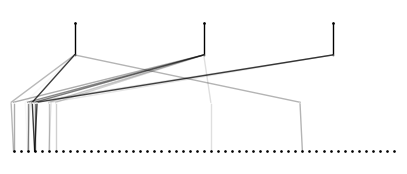

In [2043]:
model.plot()